# 1-Introduction

## Background
### semiconductor_data

The data comes from [CHIP Dataset](https://chip-dataset.vercel.app/).

- [Moore's Law](https://www.synopsys.com/glossary/what-is-moores-law.html#:~:text=Definition,as%20E%20%3D%20mc2).)
- [Wikipedia - Moore's Law](https://en.wikipedia.org/wiki/Moore%27s_law)

> Moore's law is the observation that the number of transistors in a dense integrated circuit (IC) doubles about every two years. Moore's law is an observation and projection of a historical trend. Rather than a law of physics, it is an empirical relationship linked to gains from experience in production.

Paper for citation: [Summarizing CPU and GPU Design Trends with Product Data](https://arxiv.org/abs/1911.11313)

Note that the authors prohibit resharing the dataset, we have a simple summary. You can easily download the full dataset at the bottom of: <https://chip-dataset.vercel.app/>

# In this Notebook we will explore the following tasks
We will practice data cleaning skills on the main data (not the summarized version) by perfoming the following tasks:
1. Explore the missingness in the dataset for categorical and numerical data
2. Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.
3. Drop non-consequntial fields
4. Transform temporal data to their corrrect format (date time)
5. Perfom a full EDA and demonstrate the validity of the following assumptions
> - Moore's Law still holds, especially in GPUs.
> - Dannard Scaling is still valid in general.
> - CPUs have higher frequencies, but GPUs are catching up.
> - GPU performance doubles every 1.5 years.
> - GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.
> - High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.
> - Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors
> - TSMC makes the highest number of chips in the world

6. Calculate and visualized the correlation among the features
7. Perfom the correct encoding for your data, in readiness for modelling.

# bonus task

Since it is your first week of ML, it is okay if you do not proceed to this section, however, if you feel adventureous, you can explore a classification model to predict whether a product is a GPU or a CPU based on the other independent variables.
- Compare the perfomance of a Random Forest Classifier with that of a Logistic Regression Model


# data dictionary

# `semiconductor-chips.csv`

|variable                 |class     |description |
|:------------------------|:---------|:-----------|
|date                     |double    |Date of release    |
|type                     |character |Type of chip    |
|foundry                  |character | Creator    |
|vendor                   |character | Vendor    |
|process_size_nm_mean     |double    | Process size in nanometer    |
|process_size_nm_sd       |double    |    Process size in nanometer |
|tdp_w_mean               |double    | Thermal design profile    |
|tdp_w_sd                 |double    |Thermal design profile    |
|die_size_mm_2_mean       |double    | Die size in millimeters^2    |
|die_size_mm_2_sd         |double    |Die size in millimeters^2    |
|transistors_million_mean |double    | Transitor count in millions    |
|transistors_million_sd   |double    |Transitor count in millions    |
|freq_m_hz_mean           |double    | Frequency (Mhz)    |
|freq_m_hz_sd             |double    |Frequency (Mhz)    |
|n                        |integer   | Total number of observations for date, type, foundry, vendor grouping    |



# 2-General EDA

In [1]:
# Importing Libaries to Use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [3]:
# Importing the data ( Note I am working with the full file data here)
chipdata = pd.read_csv("chip_dataset.csv")
chipdata.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
chipdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [ ]:
# Understanding My data
chipdata.describe()

,Freq (GHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4508.000000,800.000000,1685.000000,1278.000000
mean,1615.430790,19033.061063,5403.009359,1096.608263
std,1084.641452,44865.341218,11492.095538,5232.537404
min,100.000000,10.020000,12.800000,3.600000
25%,650.000000,1299.500000,384.000000,59.247500
50%,1400.000000,6136.500000,1248.000000,136.350000
75%,2500.000000,20175.000000,5069.000000,382.450000
max,4700.000000,653700.000000,93240.000000,81720.000000


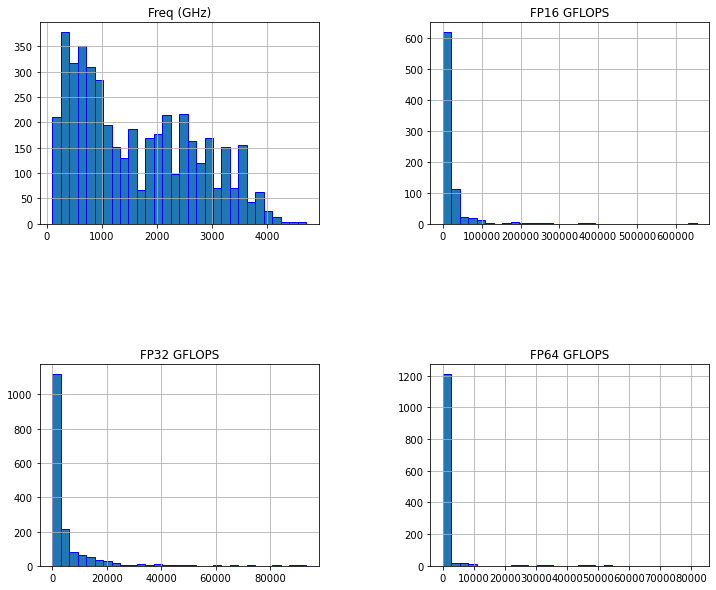

In [ ]:
chipdata.hist(figsize=(12, 10), bins=30, edgecolor="blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### Insights from Exploration
- Comparing the max and 75% values, we can see a huge difference. It confirms the intuitions that there are a couple of extreme values in Process Size, TDP, Die Size, Transistors, Freq (MHz)
- Process Size has a uniform distribution
- The range of data is large for the following : Tansistors,GFLOPS (16,32,64)

In [ ]:
# ## Pairplot
# df_pair = chipdata.drop(['Unnamed: 0','Release Date','Product','Foundry'],axis=1)
# sns.pairplot(data=df_pair, hue="Vendor", palette="viridis")

# 3-DATA CLEANING

## 3.1 Missingness

Text(0.5, 1.0, 'Missing Values Heatmap')

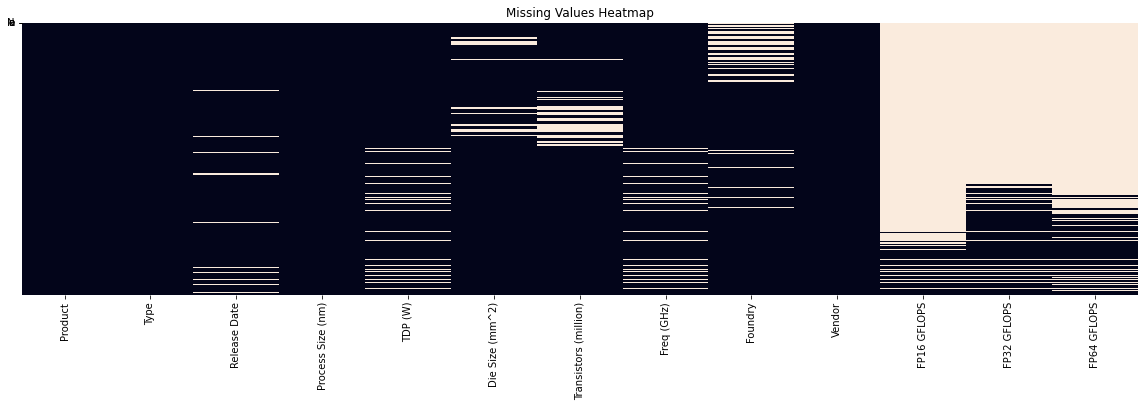

In [ ]:

plt.figure(figsize=(20,5))

sns.heatmap(chipdata.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

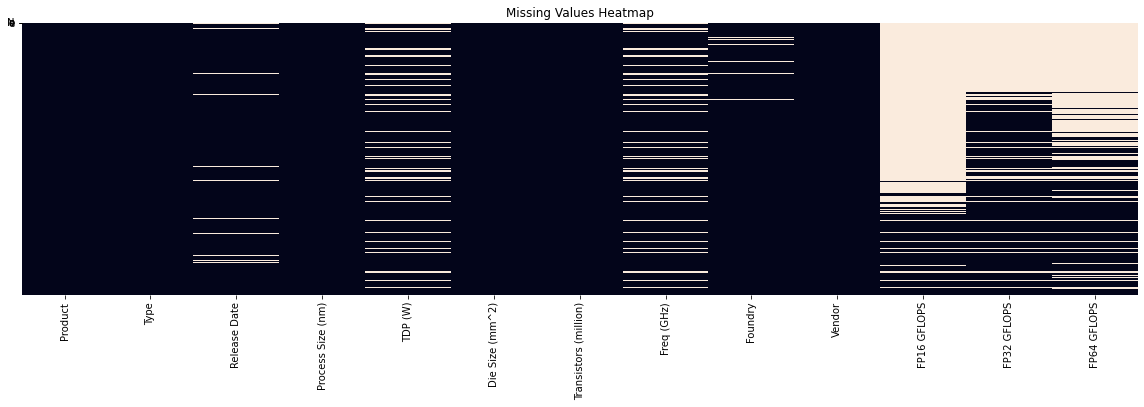

In [ ]:
## Validate if there is a difference in missingness for GPUS and CPUs
plt.figure(figsize=(20,5))

sns.heatmap(chipdata.loc[chipdata.Type =='GPU'].isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap-GPUS")


Text(0.5, 1.0, 'Missing Values Heatmap')

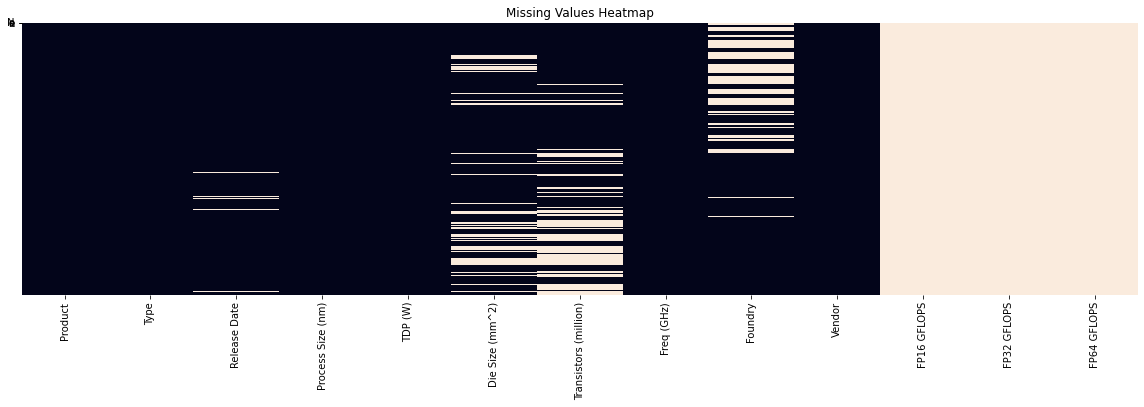

In [ ]:
## Validate if there is a difference in missingness for GPUS and CPUs
plt.figure(figsize=(20,5))

sns.heatmap(chipdata.loc[chipdata.Type =='CPU'].isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap - CPUS")

In [4]:
# Drop columns with more than 50% missing values
threshold = 50  # Adjust this threshold based on your judgment
data_cleaned = chipdata.dropna(thresh=len(chipdata) - threshold*len(chipdata)/100, axis=1)

# Impute missing values in numerical columns with mean
numerical_cols = data_cleaned.select_dtypes(include=['float64']).columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())

# Impute missing values in categorical columns with mode
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])
# Convert a column to datetime format
# data_cleaned['Release Date'] = pd.to_datetime(data_cleaned['Release Date'], format='%Y-%m-%d')

<ipython-input-4-546f98bb1557>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())
<ipython-input-4-546f98bb1557>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])


In [11]:
data_cleaned["Release Date"] = pd.to_datetime(data_cleaned["Release Date"])

<ipython-input-11-4acb1e832abe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Release Date"] = pd.to_datetime(data_cleaned["Release Date"])


In [5]:
data_cleaned["Type"].value_counts()
chipdata["Foundry"].value_counts()
chipdata["Vendor"].value_counts()

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

# 4-INSIGHTS GATHERING FROM EDA

## 4.2 - Assumption 1 Moore's Law still holds, especially in GPUs.
Moore's Law states that the number of transistors on a microchip doubles approximately every two years. To validate this assumption, observe if the "Transistors" attribute follows an upward trend over the years. If the number of transistors tends to double roughly every two years, it would support the validity of Moore's Law.


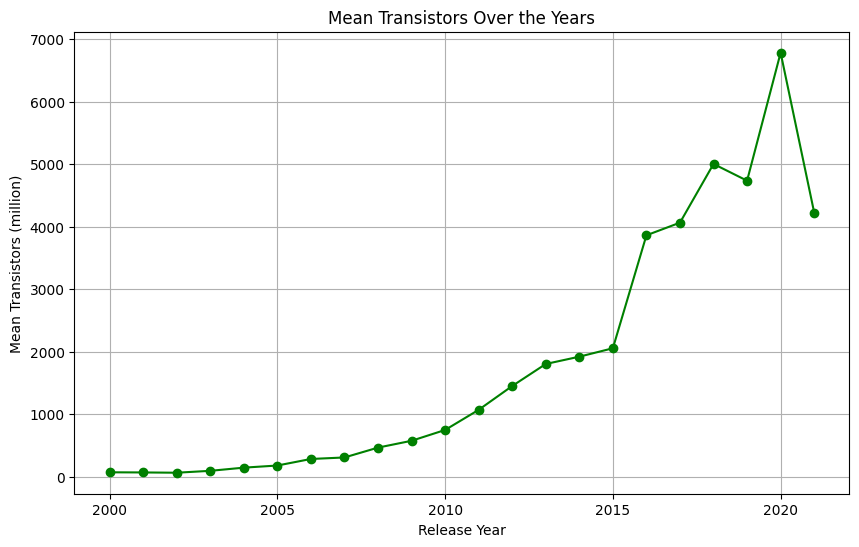

In [12]:
yearly_progress = data_cleaned.groupby(data_cleaned["Release Date"].dt.year)["Transistors (million)"].mean()
# Create a line plot of mean Transistors over the years
plt.figure(figsize=(10, 6))
yearly_progress.plot(color= 'green', marker="o")
plt.title("Mean Transistors Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Mean Transistors (million)")
plt.grid()
plt.show()

## 4.1 - Assumption 2 Dannard Scaling is still valid in general
In semiconductor electronics, Dennard scaling, also known as MOSFET scaling, is a scaling law which states roughly that, as transistors get smaller, their power density stays constant, so that the power use stays in proportion with area; both voltage and current scale (downward) with length.

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size', 'TDP',
       'Die Size', 'Transistors', 'Frequency', 'Foundry', 'Brand'],
      dtype='object')

Text(0.5, 1.0, 'CHANGES IN TRANSISTOR SIZE AND CORRESPONDING VALUES IN TRANSISTOR POWER DENSITY')

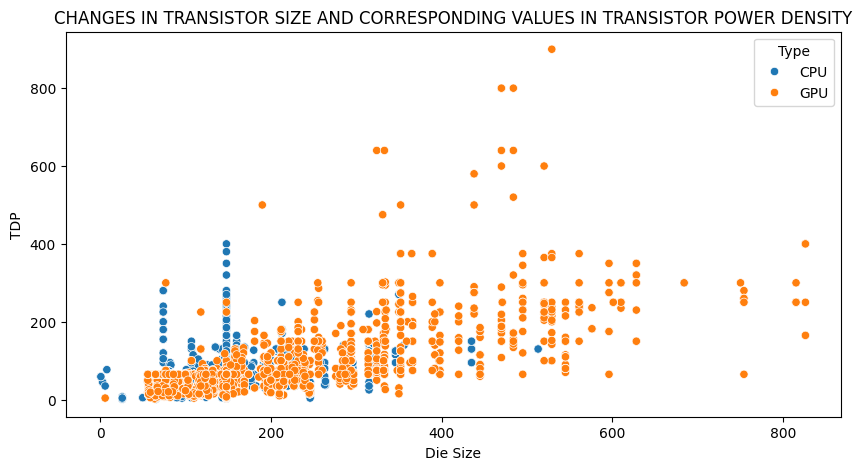

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Die Size",
           y="TDP",
           data=data_cleaned,
           hue="Type")
plt.title('CHANGES IN TRANSISTOR SIZE AND CORRESPONDING VALUES IN TRANSISTOR POWER DENSITY')

## 4.3 - ASSUMPTION 3 - CPUS HAVE HIGHER FREQUENCY BUT GPUS ARE CATCHING UP



Text(0.5, 1.0, 'CPUS HAVE HIGHER FREQUENCY BUT GPUS ARE CATCHING UP')

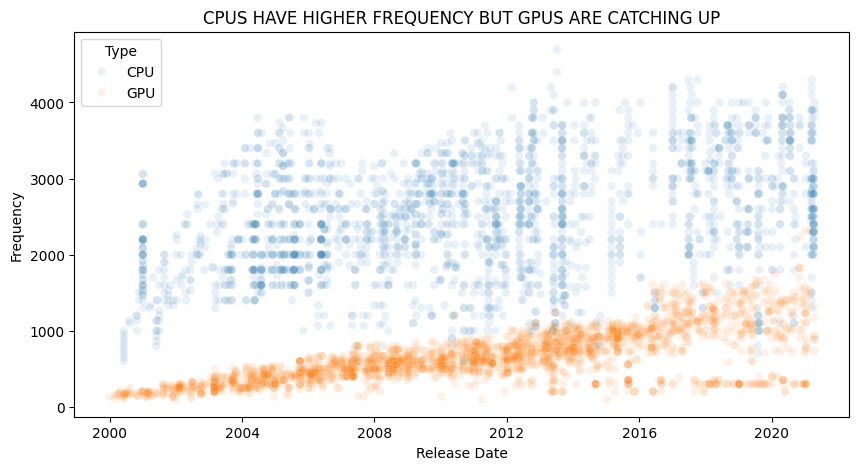

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Release Date",
           y="Frequency",
           data=data_cleaned,
           hue="Type",
           alpha = 0.1)
plt.title('CPUS have higher Frequency but GPUs are catching up'.upper())

## 4.4 - ASSUMPTION 4 - GPU PERFORMANCE DOUBLES EVERY 1.5 YEARS.



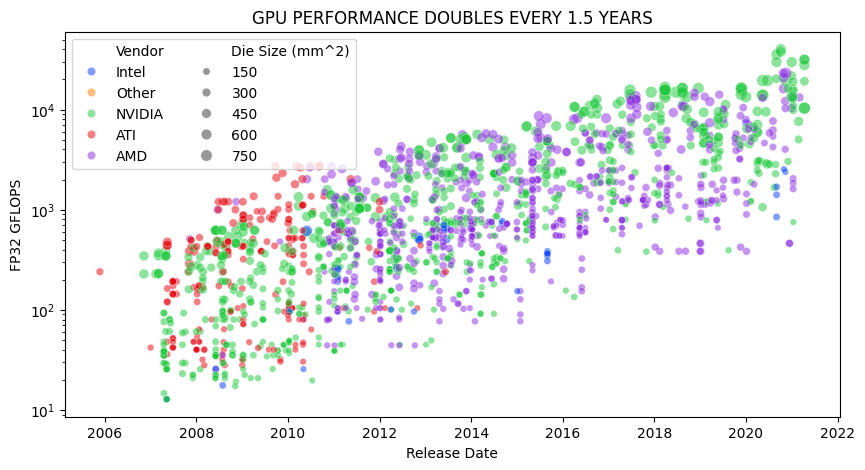

In [100]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=pd.to_datetime(chipdata["Release Date"]),
           y="FP32 GFLOPS",
           data=chipdata.loc[chipdata.Type =='GPU'],
           hue="Vendor",
           size='Die Size (mm^2)',
           alpha = 0.5)
plt.title('GPU PERFORMANCE DOUBLES EVERY 1.5 YEARS'.upper())
plt.yscale("log")
plt.legend(loc=2,ncols=2)
sns.set_palette('bright',n_colors=5)

In [55]:
chipdata.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

## 4.5 - ASSUMPTION 5 - GPU PERFORMANCE IMPROVEMENT IS A JOINT EFFECT OF SMALLER TRANSISTORS, LARGER DIE SIZE, AND HIGHER FREQUENCY



Text(0.5, 1.0, 'GPU PERFORMANCE IMPROVEMENT IS A JOINT EFFECT OF SMALLER TRANSISTORS, LARGER DIE SIZE, AND HIGHER FREQUENCY')

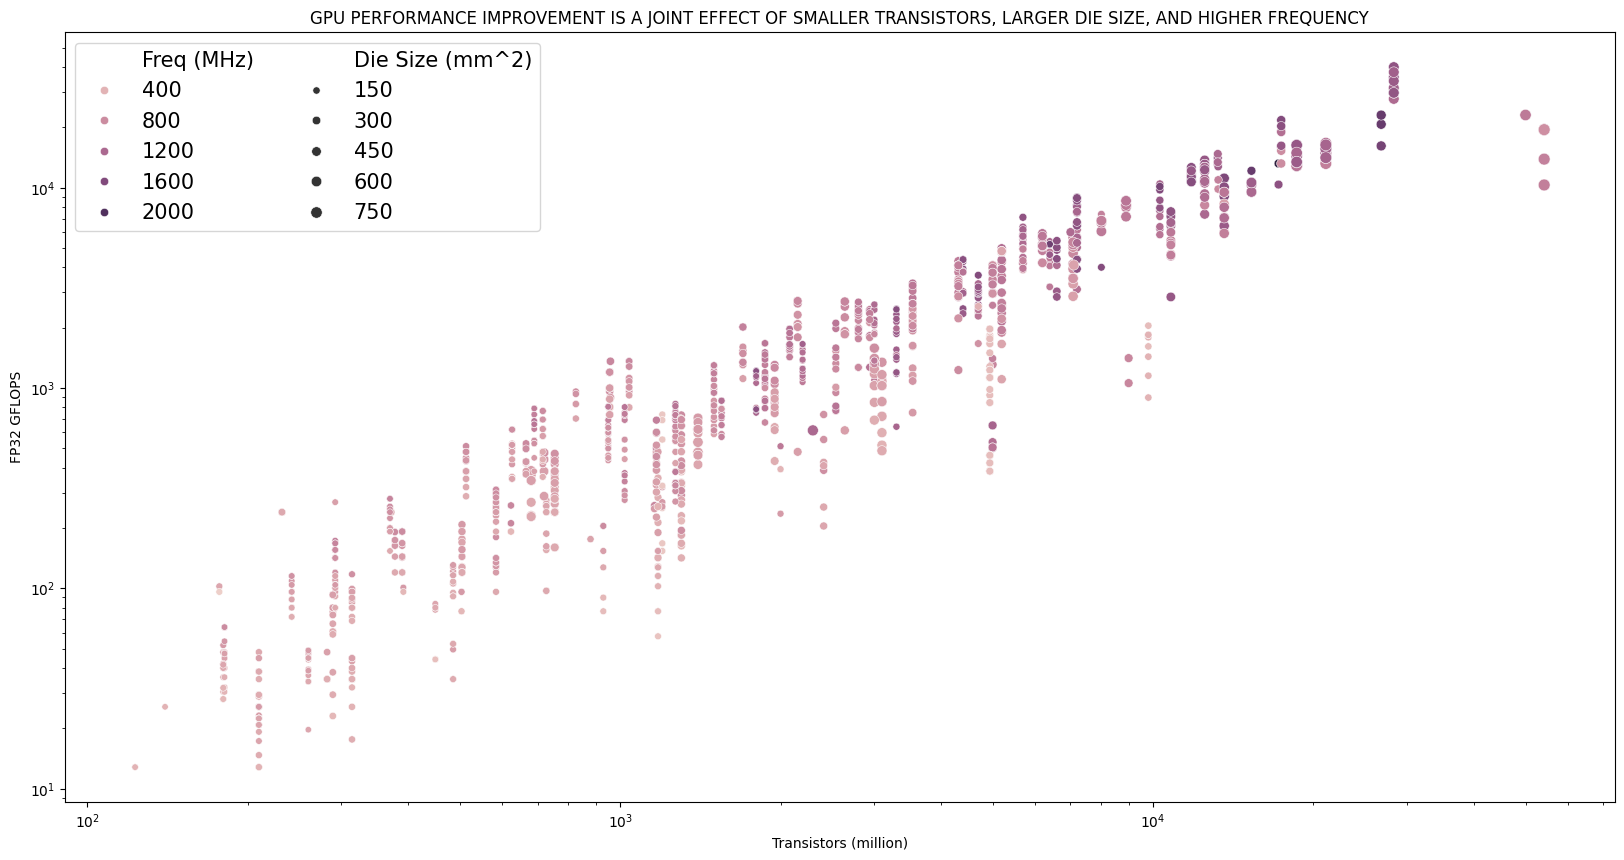

In [95]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Transistors (million)',
           y="FP32 GFLOPS",
           data=chipdata.loc[chipdata.Type =='GPU'],
           hue='Freq (MHz)',
           size='Die Size (mm^2)',
           alpha = 1)
sns.set_palette('pastel',n_colors=5)
plt.legend(loc=2,fontsize=15,ncols=2)
plt.yscale("log")
plt.xscale("log")
plt.title('GPU PERFORMANCE IMPROVEMENT IS A JOINT EFFECT OF SMALLER TRANSISTORS, LARGER DIE SIZE, AND HIGHER FREQUENCY')